# 第七章 数据可视化

数据可视化指的是通过可视化表示来探索数据，它与数据挖掘紧密相关，而数据挖掘指的是使用代码来探索数据集的规律和关联。

数据集可以是用一行代码就能表示的小型数字列表，也可以是GB、TB、PB的数据。

漂亮地呈现数据关乎的并非仅仅是漂亮的图片。以引人注目的简洁方式呈现数据，让观看者能够明白其含义，发现数据集中原本未意识到的规律和意义。

鉴于Python的高效性，使用它在笔记本电脑上就能快速地探索由数百万个数据点组成的数据集。 在基因研究、天气研究、政治经济分析等众多领域，大家都使用Python来完成数据密集型工作。

在数据可视化和分析工具中，最流行的工具之一是matplotlib，它是一个数学绘图库，我们将使用它来制作简单的图表，如折线图和散点图。

# 7.1 Matplotlib简介

Matplotlib是一个面向对象的绘图库，其绘制图表中的每一个绘图元素（如线条、文字、刻度等）都是对象。

为了实现快速绘图，Matplotlib的子模块pyplot封装了复杂的绘图对象结构，用户只需要调用pyplot模块提供的函数，就可以实现快速绘图，并设置图表的各种细节。

Matplotlib.pyplot是命令行式函数的集合，每一个函数都对图像做相应的修改，例如创建图形，在图像上创建画图区域，画线，在线上做标注等等。

# 7.2 pyplot的基本用法

%matplotlib inline ： jupyter notebook的魔法指令，使绘制出的图可以嵌入到记事本内部显示出来

import matplotlib.pyplot as plt ：引入pyplot模块

plt.plot() ：绘制折线图

plt.show() ：将绘制结果显示出来

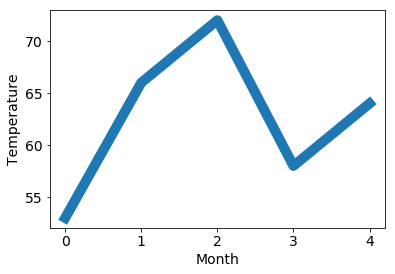

In [283]:
%matplotlib inline
import matplotlib.pyplot as plt
numbers=[53,66,72,58,64]
plt.plot(numbers,linewidth=10)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Temperature',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
plt.show()

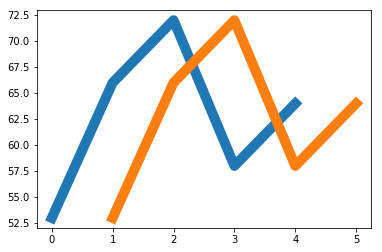

In [284]:
numbers=[53,66,72,58,64]
months=[1,2,3,4,5]

plt.plot(numbers,linewidth=10)
plt.plot(months,numbers,linewidth=10)
plt.show()

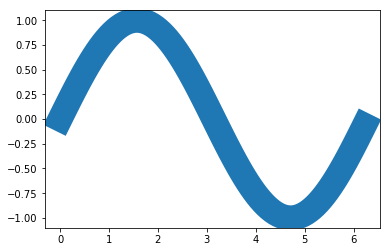

In [285]:
import math
x=[2*math.pi*i/100 for i in range(100)]
y=[math.sin(i) for i in x]
z=[math.cos(i) for i in x]
plt.plot(x,y,linewidth=25)
plt.show()

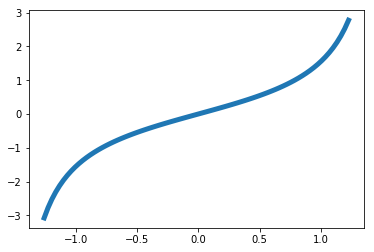

In [286]:
m=[math.pi*i/100 for i in range(-40,40)]
n=[math.tan(i) for i in m]
plt.plot(m,n,linewidth=5)
plt.show()

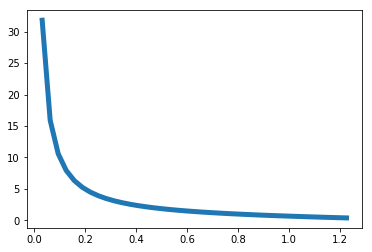

In [287]:
s=[math.pi*i/100 for i in range(1,40)]
t=[1/math.tan(i) for i in s]
plt.plot(s,t,linewidth=5)
plt.show()

参数linewidth决定了plot() 绘制的线条的粗细。 函数title()给图表指定标题。在上述代码中，出现了多次的参数fontsize 指定了图表中文字的大小。

函数xlabel() 和ylabel() 让你能够为每条轴设置标题; 而函数tick_params() 设置刻度的样式，其中指定的实参将影响x 轴和y 轴上的刻度 (axes='both' )，并将刻度标记的字号设置为14(labelsize=14 )。

# 绘制多图：plt.subplot(行数，列数，编号)编号从左到右，从上到下，从1开始

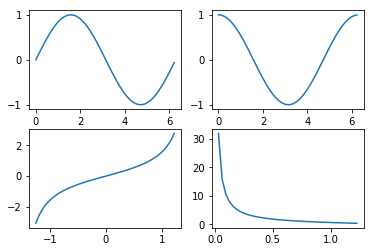

In [288]:
plt.figure(1)
plt.subplot(221)
plt.plot(x,y)
plt.subplot(222)
plt.plot(x,z)
plt.subplot(223)
plt.plot(m,n)
plt.subplot(224)
plt.plot(s,t)
plt.show()

# 绘制散点图

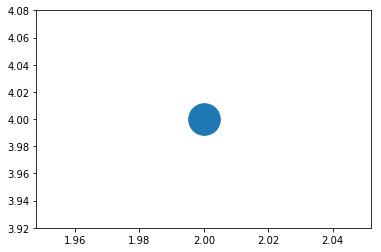

In [289]:
plt.scatter(2,4,s=1000)

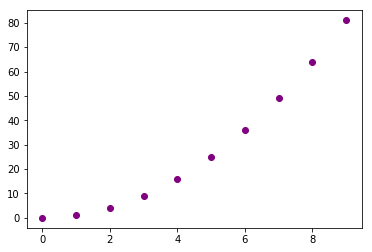

In [290]:
x=range(10)
y=[i**2 for i in x]
plt.scatter(x,y,c='purple')

<BarContainer object of 10 artists>

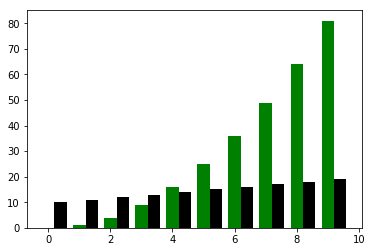

In [291]:
x=range(10)
y=[i**2 for i in x]
z=[i+10 for i in x]
plt.bar(x,y,width=0.4,color='green')
plt.bar([i+0.4 for i in x],z,width=0.4,color='black')

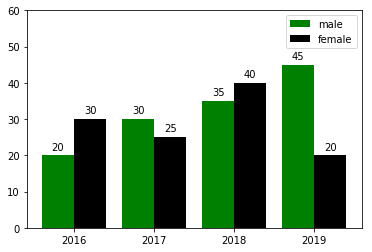

In [292]:
x=range(4)
x_value=[2016,2017,2018,2019]
y=[20,30,35,45]
z=[30,25,40,20]
rect1=plt.bar(x,y,width=0.4,color='green',label='male')
rect2=plt.bar([i+0.4 for i in x],z,width=0.4,color='black',label='female')
plt.legend()
plt.xticks([i+0.2 for i in x],x_value)
plt.ylim(0,60)

for rect in rect1:
    plt.text(rect.get_x()+0.2,rect.get_height()+1,str(rect.get_height()),ha='center',va='bottom')
for rect in rect2:
    plt.text(rect.get_x()+0.2,rect.get_height()+1,str(rect.get_height()),ha='center',va='bottom')

# plt,text(x,y,text,halign,valign)

# 随机漫步

C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


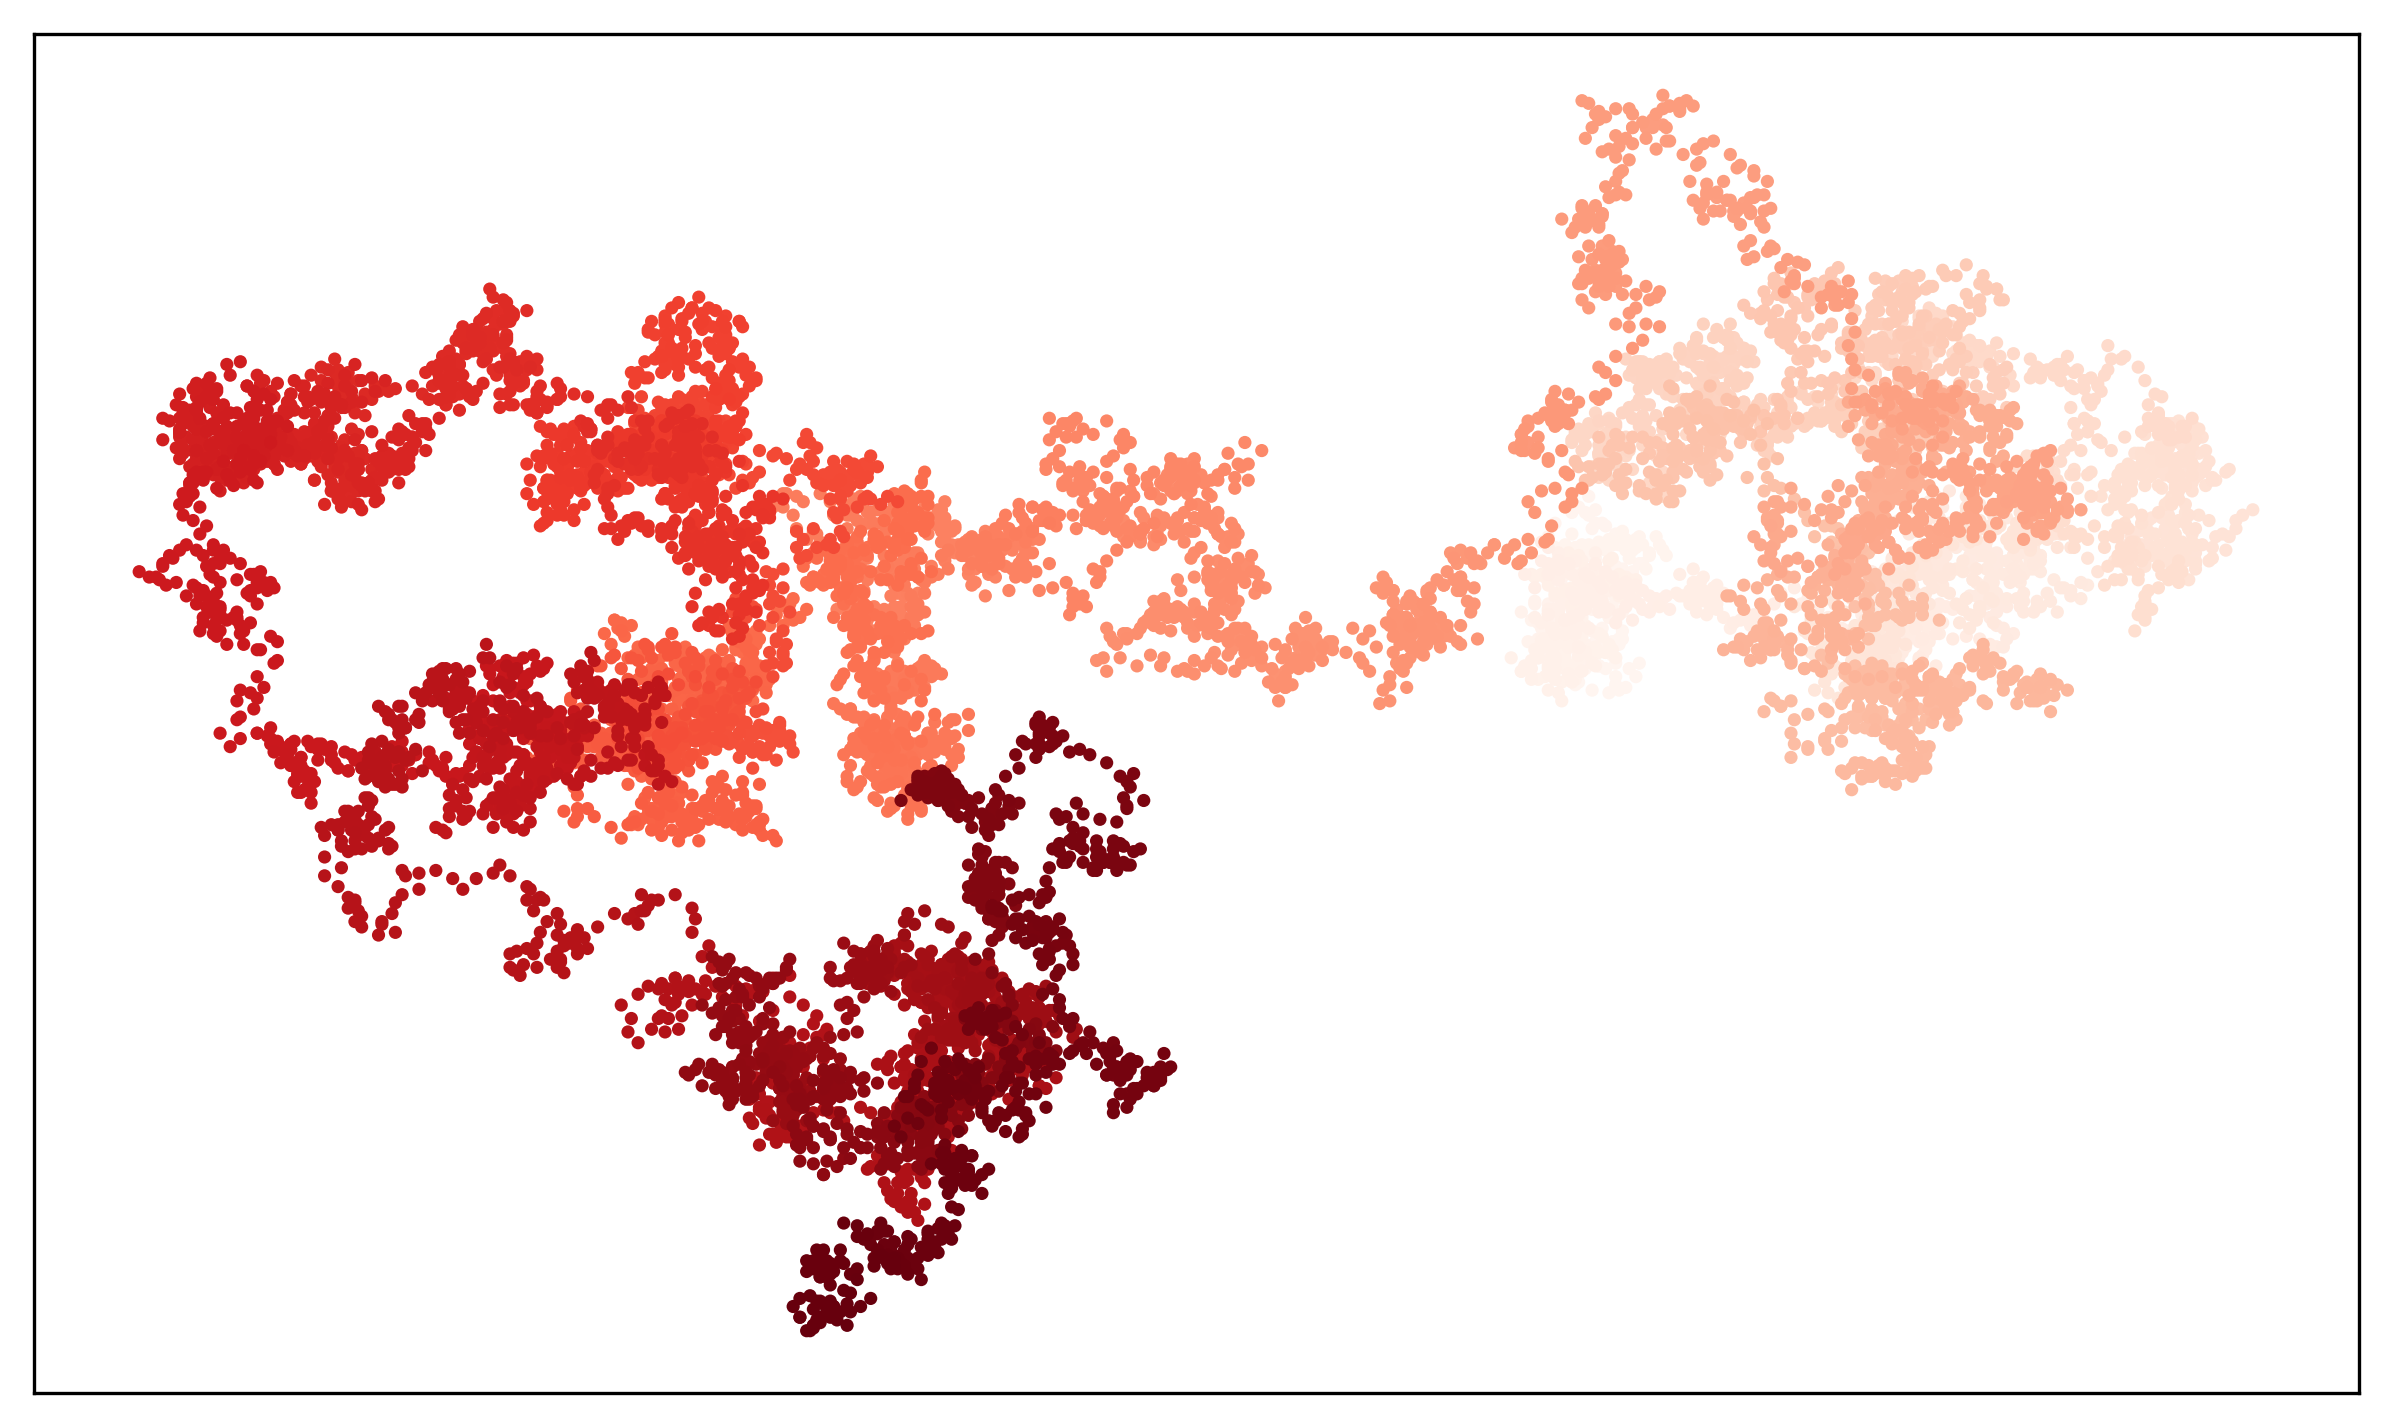

In [293]:
from random import choice


def walk(total):
    x_values=[0]
    y_values=[0]
    
    while len(x_values)<total:
        x_direction=choice([-1,1])
        x_distance=choice([1,2,3,4,5])
        x_move=x_direction*x_distance
        y_direction=choice([-1,1])
        y_distance=choice([1,2,3,4,5])
        y_move=y_direction*y_distance
        x_new=x_values[-1]+x_move
        y_new=y_values[-1]+y_move
        x_values.append(x_new)
        y_values.append(y_new)
    return x_values,y_values

result=walk(10000)
number=range(len(result[0]))
plt.figure(dpi=300,figsize=(10,6))
plt.scatter(result[0],result[1],s=10,cmap=plt.cm.Reds,c=number,edgecolor='none')
plt.axes().get_xaxis().set_visible(False)
plt.axes().get_yaxis().set_visible(False)
plt.show()

# 第八章 Numpy库

# Python模块中的numpy，这是一个处理数组的强大模块，而该模块也是其他数据分析模块(如pandas和scipy)的核心。
接下面将从这五个方面来介绍numpy模块的内容：
1）数组的创建
2）有关数组的属性和函数
3）数组元素的获取-普通索引，切片，布尔索引和花式索引
4）统计函数与线性代数运算

# 8.1 数组的创建

# 8.1.1 一维数组的创建

# 可以使用numpy中的arange()函数创建一维有序数组，它是内置函数range的扩展板

In [294]:
import numpy as np
list=[0,1,2,3,4,5]
print(list)
print(type(list))

arr1=np.arange(6)
print(arr1)
print(type(arr1))



[0, 1, 2, 3, 4, 5]
<class 'list'>
[0 1 2 3 4 5]
<class 'numpy.ndarray'>


# 通过arange生成的序列就不是简简单单的列表类型了，而是一个一维数组

# 如果一维数组不是一个规律的有序元素，而是人为的输入，就需要array()函数创建了。

In [295]:
arr2=np.array((1,4,6,8,3,6,8,9))
print(arr2)
arr3=np.array((1,5,7,8,3,6,8,0))
print(arr3)

[1 4 6 8 3 6 8 9]
[1 5 7 8 3 6 8 0]


# 8.1.2 二维数组的创建

In [296]:
arr4=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr4)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [297]:
arr5=np.ones(6)
print(arr5)

[1. 1. 1. 1. 1. 1.]


In [298]:
arr6=np.ones([4,5])
print(arr6)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [299]:
arr7=np.zeros([3,5])
print(arr7)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [300]:
arr8=np.empty([3,5])
print(arr8)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


# 8.2 有关数组的属性和函数

In [301]:
arr=np.array([[1,3,5,7],[2,4,6,8],[3,7,9,2]])
print(arr)

[[1 3 5 7]
 [2 4 6 8]
 [3 7 9 2]]


# shape方法返回数组的行数和列数1

In [302]:
arr.shape

(3, 4)

# dtype返回数组的数据类型

In [303]:
arr.dtype

dtype('int32')

In [304]:
print(arr.flatten)

<built-in method flatten of numpy.ndarray object at 0x00000000087693A0>


In [305]:
print(arr.ravel())

[1 3 5 7 2 4 6 8 3 7 9 2]


# 返回数组维数

In [306]:
arr.ndim

2

# 返回数组元素个数

In [307]:
arr.size

12

# 返回数组的转置结果

In [308]:
print(arr)
print(arr.T)

[[1 3 5 7]
 [2 4 6 8]
 [3 7 9 2]]
[[1 2 3]
 [3 4 7]
 [5 6 9]
 [7 8 2]]


# 返回数组多少行

In [309]:
len(arr)

3

# 横向拼接两个数组，但必须满足两个数组的行数相同

In [310]:
print(arr)
print(arr4)
print(np.hstack((arr,arr4)))

[[1 3 5 7]
 [2 4 6 8]
 [3 7 9 2]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 3 5 7 1 2 3]
 [2 4 6 8 4 5 6]
 [3 7 9 2 7 8 9]]


# 纵向拼接两个数组，但必须满足两个数组的列数相同

In [311]:
print(arr.T)
print(arr4)
print(np.vstack((arr.T,arr4)))

[[1 2 3]
 [3 4 7]
 [5 6 9]
 [7 8 2]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [3 4 7]
 [5 6 9]
 [7 8 2]
 [1 2 3]
 [4 5 6]
 [7 8 9]]


# reshape()函数和resize()函数可以重新设置数组的行数和列数

In [312]:
arr5=np.arange(24)
print(arr5)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [313]:
arr6=arr5.reshape(4,6)
print(arr6)
print(arr5)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [314]:
arr7=arr5.resize(6,4)
print(arr7)
print(arr5)

None
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


# tolist()将数组转换成列表，astype()强制转换数组数据类型

In [315]:
arr6.tolist()

[[0, 1, 2, 3, 4, 5],
 [6, 7, 8, 9, 10, 11],
 [12, 13, 14, 15, 16, 17],
 [18, 19, 20, 21, 22, 23]]

In [316]:
arr7=arr6.astype(float)
print(arr7)

[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]]


# 8.3 数组元素的获取

# 通过索引和切片的方式获取数据元素

# 一维数组元素的获取与列表，元组的获取方式相同

In [317]:
arr8=np.arange(10)
arr8

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [318]:
arr8[8]

8

In [319]:
arr8[3:]

array([3, 4, 5, 6, 7, 8, 9])

In [320]:
arr8[:6]

array([0, 1, 2, 3, 4, 5])

In [321]:
arr8[-4:]

array([6, 7, 8, 9])

In [322]:
arr8[::2]

array([0, 2, 4, 6, 8])

# 二维数组元素的获取

In [323]:
arr9=np.arange(12).reshape(3,4)
arr9

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [324]:
arr9[1]

array([4, 5, 6, 7])

In [325]:
arr9[:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [326]:
arr9[[0,2]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [327]:
arr9[ :,2]

array([ 2,  6, 10])

In [328]:
arr9

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [329]:
arr9[:,[0,1]]

array([[0, 1],
       [4, 5],
       [8, 9]])

In [330]:
arr9[:,0:2]

array([[0, 1],
       [4, 5],
       [8, 9]])

In [331]:
arr10=arr9[1:,2:]
arr10.reshape(4)

array([ 6,  7, 10, 11])

In [332]:
arr10=arr9[1:,2:]
arr10.flatten()

array([ 6,  7, 10, 11])

In [333]:
arr9[:,[0,3]]

array([[ 0,  3],
       [ 4,  7],
       [ 8, 11]])

# 布尔索引，即索引值为True和False

In [334]:
arr10=np.arange(24).reshape(6,4)
arr10

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [335]:
select=np.array([True,False,True,False,False,True])
select

array([ True, False,  True, False, False,  True])

In [336]:
arr10[select]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [20, 21, 22, 23]])

In [337]:
arr10[~select]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

# 应用中的例子

In [338]:
names=np.array(['zhangsan','lisi','wangwu','zhaoliu'])
names

array(['zhangsan', 'lisi', 'wangwu', 'zhaoliu'], dtype='<U8')

In [339]:
data=np.random.randn(4,5)
data

array([[ 1.29086516,  2.05744577,  1.73460434,  0.99512229,  1.36052178],
       [-0.59420386,  0.93221201,  0.46726747,  0.20709568,  1.15907464],
       [ 0.68601696, -0.07175043, -0.62172512,  0.01180805,  1.050144  ],
       [ 2.01980313,  1.20340083,  0.61695097,  0.10607471, -0.56829252]])

In [340]:
data[names=='zhangsan']

array([[1.29086516, 2.05744577, 1.73460434, 0.99512229, 1.36052178]])

In [341]:
data[names=='lisi',3]

array([0.20709568])

In [342]:
mask=(names=='zhangsan')|(names=='wangwu')
mask

array([ True, False,  True, False])

In [343]:
data[mask]

array([[ 1.29086516,  2.05744577,  1.73460434,  0.99512229,  1.36052178],
       [ 0.68601696, -0.07175043, -0.62172512,  0.01180805,  1.050144  ]])

# 通过布尔型数组设置值是一种经常使用的手段

In [344]:
data1=np.random.randn(8,5)
data1

array([[-0.77443872,  0.88061307, -1.15544174,  0.82666206, -0.34082558],
       [ 0.74016372, -0.02584768, -1.33701299, -0.41942134,  0.2553234 ],
       [-0.32416488,  0.4037088 , -0.49779813, -1.2786267 , -0.14773363],
       [ 0.82387696,  1.70167308,  0.38812619,  1.16197726, -0.81378705],
       [ 1.08268607,  0.36388491,  0.18094148,  0.89212064,  0.27340477],
       [ 0.45958564,  1.19215556,  0.27791905, -0.6293913 ,  0.65901103],
       [ 0.27434636, -1.56751022,  0.80900517,  0.50821495, -2.50007163],
       [-0.16175373,  0.04829246, -0.6066009 ,  0.19420364, -0.3616497 ]])

In [345]:
data1[data1<0]=0
data1

array([[0.        , 0.88061307, 0.        , 0.82666206, 0.        ],
       [0.74016372, 0.        , 0.        , 0.        , 0.2553234 ],
       [0.        , 0.4037088 , 0.        , 0.        , 0.        ],
       [0.82387696, 1.70167308, 0.38812619, 1.16197726, 0.        ],
       [1.08268607, 0.36388491, 0.18094148, 0.89212064, 0.27340477],
       [0.45958564, 1.19215556, 0.27791905, 0.        , 0.65901103],
       [0.27434636, 0.        , 0.80900517, 0.50821495, 0.        ],
       [0.        , 0.04829246, 0.        , 0.19420364, 0.        ]])

In [346]:
data[names!='zhangsan']=5
data

array([[1.29086516, 2.05744577, 1.73460434, 0.99512229, 1.36052178],
       [5.        , 5.        , 5.        , 5.        , 5.        ],
       [5.        , 5.        , 5.        , 5.        , 5.        ],
       [5.        , 5.        , 5.        , 5.        , 5.        ]])

# 花式索引

# 将数组作为索引将原数组的元素提取出来

In [347]:
data2=np.arange(1,29).reshape(7,4)
data2

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24],
       [25, 26, 27, 28]])

In [348]:
data2[[4,1,5,2]]

array([[17, 18, 19, 20],
       [ 5,  6,  7,  8],
       [21, 22, 23, 24],
       [ 9, 10, 11, 12]])

In [349]:
data2[[4,1,5,2]][2:,[0,2]]

array([[21, 23],
       [ 9, 11]])

In [350]:
data2[[4,2,0],[2,0,1]]

array([19,  9,  2])

In [351]:
data2

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24],
       [25, 26, 27, 28]])

# 8.4 统计函数与线性代数运算

# 统计运算中常见的聚合函数有:最小值，最大值，中位数，均值，方差，标准差等。首先来看看数组的级别运算:

In [352]:
arr11=5-np.arange(1,13).reshape(4,3)
arr11

array([[ 4,  3,  2],
       [ 1,  0, -1],
       [-2, -3, -4],
       [-5, -6, -7]])

In [353]:
arr12=np.random.randint(1,10,size=12).reshape(4,3)
arr12

array([[7, 2, 9],
       [3, 1, 2],
       [2, 7, 1],
       [9, 3, 2]])

In [354]:
arr11**2

array([[16,  9,  4],
       [ 1,  0,  1],
       [ 4,  9, 16],
       [25, 36, 49]], dtype=int32)

In [355]:
np.sqrt(arr11)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[2.        , 1.73205081, 1.41421356],
       [1.        , 0.        ,        nan],
       [       nan,        nan,        nan],
       [       nan,        nan,        nan]])

In [356]:
np.abs(arr11)

array([[4, 3, 2],
       [1, 0, 1],
       [2, 3, 4],
       [5, 6, 7]])

In [357]:
arr11%arr12

array([[4, 1, 2],
       [1, 0, 1],
       [0, 4, 0],
       [4, 0, 1]], dtype=int32)

In [358]:
np.sum(arr11,axis=1)

array([  9,   0,  -9, -18])

In [359]:
arr11

array([[ 4,  3,  2],
       [ 1,  0, -1],
       [-2, -3, -4],
       [-5, -6, -7]])

# 累加

In [360]:
np.cumsum(arr11)

array([  4,   7,   9,  10,  10,   9,   7,   4,   0,  -5, -11, -18],
      dtype=int32)

# 累乘

In [361]:
np.cumprod(arr11)

array([ 4, 12, 24, 24,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int32)

In [362]:
np.max(arr11)

4

In [363]:
np.min(arr11)

-7

# 均值

In [364]:
np.mean(arr11,axis=1)

array([ 3.,  0., -3., -6.])

# 中位数

In [365]:
np.median(arr11,axis=1)

array([ 3.,  0., -3., -6.])

# 加权平均

In [366]:
np.average(arr11,weights=arr12)

-1.1041666666666667

In [367]:
np.var(arr11)

11.916666666666666

In [368]:
np.std(arr11)

3.452052529534663

In [369]:
np.diff(arr12)

array([[-5,  7],
       [-2,  1],
       [ 5, -6],
       [-6, -1]])

In [370]:
arr12

array([[7, 2, 9],
       [3, 1, 2],
       [2, 7, 1],
       [9, 3, 2]])

# where()函数

In [371]:
arr11

array([[ 4,  3,  2],
       [ 1,  0, -1],
       [-2, -3, -4],
       [-5, -6, -7]])

In [372]:
np.where(arr11<0,'negative','positive')

array([['positive', 'positive', 'positive'],
       ['positive', 'positive', 'negative'],
       ['negative', 'negative', 'negative'],
       ['negative', 'negative', 'negative']], dtype='<U8')

unique(x):计算x的唯一元素，并返回有序结果
intersect1d(x,y):计算x和y的，即交集
union1d(x,y):计算x和y的并集
setdiff1d(x,y):计算x和y的差集，即元素在x中，不在y中
setxor1d(x,y):计算集合的对称差，即存在于一个数组中，但同时不存在于两个数组中
in1d(x,y):判断x的元素是否包含于y中

In [373]:
np.unique(arr11)

array([-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4])

In [374]:
np.intersect1d(arr11,arr12)

array([1, 2, 3])

In [375]:
np.union1d(arr11,arr12)

array([-7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  7,  9])

In [376]:
np.setdiff1d(arr11,arr12)

array([-7, -6, -5, -4, -3, -2, -1,  0,  4])

In [377]:
np.setdiff1d(arr12,arr11)

array([7, 9])

In [378]:
np.setxor1d(arr11,arr12)

array([-7, -6, -5, -4, -3, -2, -1,  0,  4,  7,  9])

In [379]:
np.in1d(arr11,arr12)

array([False,  True,  True,  True, False, False, False, False, False,
       False, False, False])

# 线性代数运算

# numpu可以非常方便的进行线性代数方面的计算

In [380]:
arr13=np.array([[1,2,3,5],[2,4,1,6],[1,1,4,3],[2,5,4,1]])
arr13

array([[1, 2, 3, 5],
       [2, 4, 1, 6],
       [1, 1, 4, 3],
       [2, 5, 4, 1]])

# 行列式

In [381]:
np.linalg.det(arr13)

51.00000000000002

# 方阵的逆阵

In [382]:
np.linalg.inv(arr13)#逆矩阵

array([[-2.23529412,  1.05882353,  1.70588235, -0.29411765],
       [ 0.68627451, -0.25490196, -0.7254902 ,  0.2745098 ],
       [ 0.19607843, -0.21568627,  0.07843137,  0.07843137],
       [ 0.25490196,  0.01960784, -0.09803922, -0.09803922]])

In [383]:
arr13.T#转置矩阵

array([[1, 2, 1, 2],
       [2, 4, 1, 5],
       [3, 1, 4, 4],
       [5, 6, 3, 1]])

In [384]:
np.trace(arr13)#对角线元素之和

10

# 特征值和特征向量

In [385]:
np.linalg.eig(arr13)

(array([11.35035004, -3.99231852, -0.3732631 ,  3.01523159]),
 array([[-0.4754174 , -0.48095078, -0.95004728,  0.19967185],
        [-0.60676806, -0.42159999,  0.28426325, -0.67482638],
        [-0.36135292, -0.16859677,  0.08708826,  0.70663129],
        [-0.52462832,  0.75000995,  0.09497472, -0.07357122]]))

In [386]:
np.linalg.eigvals(arr13)#特征值

array([11.35035004, -3.99231852, -0.3732631 ,  3.01523159])

In [387]:
np.linalg.qr(arr13)#qr分解

(array([[-0.31622777, -0.07254763, -0.35574573, -0.87645982],
        [-0.63245553, -0.14509525,  0.75789308, -0.06741999],
        [-0.31622777, -0.79802388, -0.38668014,  0.33709993],
        [-0.63245553,  0.580381  , -0.38668014,  0.33709993]]),
 array([[-3.16227766, -6.64078309, -5.37587202, -6.95701085],
        [ 0.        ,  1.37840488, -1.23330963, -3.04700025],
        [ 0.        ,  0.        , -3.40278524,  1.22190924],
        [ 0.        ,  0.        ,  0.        , -3.4384193 ]]))

In [388]:
np.linalg.svd(arr13)#奇异值分解

(array([[-0.50908395,  0.27580803,  0.35260559, -0.73514132],
        [-0.59475561,  0.4936665 , -0.53555663,  0.34020325],
        [-0.39377551, -0.10084917,  0.70979004,  0.57529852],
        [-0.48170545, -0.81856751, -0.29162732, -0.11340459]]),
 array([11.82715609,  4.35052602,  3.17710166,  0.31197297]),
 array([[-0.25836994, -0.52417446, -0.47551003, -0.65755329],
        [-0.10914615, -0.38326507, -0.54167613,  0.74012294],
        [-0.18632462, -0.68784764,  0.69085326,  0.12194478],
        [ 0.94160248, -0.32436807, -0.05655931, -0.07050652]]))

In [389]:
np.dot(arr13,arr13)#真正的矩阵乘积运算

array([[18, 38, 37, 31],
       [23, 51, 38, 43],
       [13, 25, 32, 26],
       [18, 33, 31, 53]])

In [390]:
#求解线性方程组
#numpy。linalg中的函数solve可以求解形如Ax=b的线性方程组，其中A为矩阵，


import numpy as np

#创建矩阵和数组
A=np.mat("1 -2 1;0 2 -8;-4 5 9")
b=np.array([0,8,-9])

#调用solve函数求解线性方程
x=np.linalg.solve(A,b)
print(x)








[29. 16.  3.]


# 8.5 随机数生成

# 统计学中经常会讲到数据的分布特征，如正态分布，指数分布，卡方分布，二项分布，泊松分布等，下面就讲讲有关分布的随机数生成

# 使用二项分布进行赌博

# 同时抛弃9枚硬币，如果正面朝上少于5枚，则输掉10元，否则就赢10元。如果手中有1000元作为赌资，请问赌博10000次后可能会出现什么情况呢

In [391]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

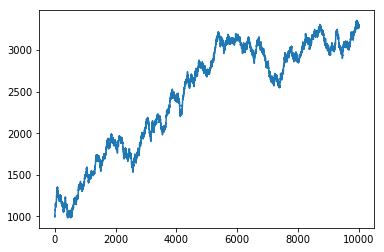

1880.0


In [392]:
binomial=np.random.binomial(9,0.5,10000)#生成二项分布随机数
money=np.zeros(10000)#生成10000次赌资的列表
money[0]=1000#首次赌资为1000元

for i in range(1,10000):
    if binomial[i]<5:
        money[i]=money[i-1]-10
    else:
        money[i]=money[i-1]+10




plt.plot(np.arange(10000),money)
plt.show()
print(money[2000])

# 使用随机整数实现随机游走

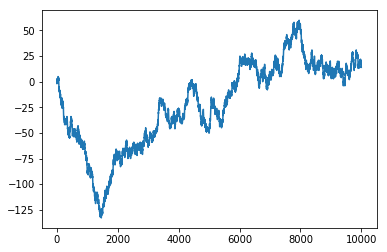

In [393]:
step=np.where(np.random.randint(0,2,10000)>0,-1,1)
position=np.cumsum(step)

plt.plot(np.arange(10000),position)
plt.show()

# 第九章 基于Numpy的统计分析实战

# 学习内容：从文件中读取数据  将数据写入文件  利用数学和统计分析函数完成实际统计和应用

# 9.1 文件文本读写

In [394]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

arr1=np.ones([3,4])
np.savetxt('data_output.txt',arr1)#运用numpy.savetxt方法写入文本文件
arr1


array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [395]:
arr2=np.loadtxt('data_output.txt')#运用numpy.loadtxt方法读文件  一个参数: 文件名str
arr2

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

# numpy.loadtxt读CSV文件

# CSV格式是一种常见的文件格式。通常，数据库的转存文件就是CSV格式的，文件中的各个字段对应于数据库中的列。Microsoft Excel也可以处理CSV文件。

# numpy.loadtxt(fname,dtype=,comments='#',delimiter=None,converters=None,skiprows0,usecols=None,unpack=False)

# fname:文件名，数据类型为字符串;

# dtype:读取数据的类型，可选;

# skiprows:跳过前n行，如果设置skiprows=2，就会跳过前两行;

# comment:如果行的开头为#就会跳过该行;

# delimiter:用于分隔值的字符，缺省值为任何空白字符，如空格，制表符;

# usecols:读取部分列。从0开始，例：“usecols=(1,4,5)”,将读取第二列，第五列，第六列。

# unpack:为True则把每一列当成一个数组输出

# converters:对数据进行预处理的参数，可以定义一个函数进行预处理

In [396]:
endPrice,turnOver=np.loadtxt(fname='data.csv',delimiter=',',usecols=(6,7),unpack=True)
print(endPrice)
print(turnOver)

[336.1  339.32 345.03 344.32 343.44 346.5  351.88 355.2  358.16 354.54
 356.85 359.18 359.9  363.13 358.3  350.56 338.61 342.62 342.88 348.16
 353.21 349.31 352.12 359.56 360.   355.36 355.76 352.47 346.67 351.99]
[21144800. 13473000. 15236800.  9242600. 14064100. 11494200. 17322100.
 13608500. 17240800. 33162400. 13127500. 11086200. 10149000. 17184100.
 18949000. 29144500. 31162200. 23994700. 17853500. 13572000. 14395400.
 16290300. 21521000. 17885200. 16188000. 19504300. 12718000. 16192700.
 18138800. 16824200.]


In [397]:
np.loadtxt(fname='data.csv',delimiter=',',usecols=3,unpack=True)

array([344.17, 335.8 , 341.3 , 344.45, 343.8 , 343.61, 347.89, 353.68,
       355.19, 357.39, 354.75, 356.79, 359.19, 360.8 , 357.1 , 358.21,
       342.05, 338.77, 344.02, 345.29, 351.21, 355.47, 349.96, 357.2 ,
       360.07, 361.11, 354.91, 354.69, 349.69, 345.4 ])

In [398]:
endPrice.max()

363.13

In [399]:
endPrice.min()

336.1

In [400]:
endPrice.mean()

351.0376666666667

In [401]:
np.median(endPrice)

352.055

In [402]:
np.std(endPrice)

7.080008325481608

# 9.2 计算成交量加权平均价格

In [403]:
print(np.average(endPrice))
print(np.average(endPrice,weights=turnOver))

351.0376666666667
350.5895493532009


# 9.3 计算最大值和最小值

# max()

# min()

# 9.4 计算极差

# ptp()

# 9.5 计算中位数

# median()

# 9.6 计算方差

# var()

# 9.7 计算股票收益率，年波动率，月波动率

In [404]:
print(endPrice)
print(np.log(endPrice))
logReturns=np.diff(np.log(endPrice))
print(logReturns)

[336.1  339.32 345.03 344.32 343.44 346.5  351.88 355.2  358.16 354.54
 356.85 359.18 359.9  363.13 358.3  350.56 338.61 342.62 342.88 348.16
 353.21 349.31 352.12 359.56 360.   355.36 355.76 352.47 346.67 351.99]
[5.81740873 5.82694361 5.84363137 5.84157146 5.83901242 5.84788282
 5.86329021 5.87268101 5.88097981 5.87082117 5.87731553 5.88382366
 5.88582622 5.8947609  5.88137062 5.85953188 5.824849   5.83662196
 5.83738053 5.85266214 5.86706278 5.85595978 5.86397203 5.88488106
 5.88610403 5.87313136 5.87425635 5.86496551 5.84837332 5.86360277]
[ 0.00953488  0.01668775 -0.00205991 -0.00255903  0.00887039  0.01540739
  0.0093908   0.0082988  -0.01015864  0.00649435  0.00650813  0.00200256
  0.00893468 -0.01339027 -0.02183875 -0.03468287  0.01177296  0.00075857
  0.01528161  0.01440064 -0.011103    0.00801225  0.02090904  0.00122297
 -0.01297267  0.00112499 -0.00929083 -0.01659219  0.01522945]


In [405]:
annual_volatility=logReturns.std()/logReturns.mean()*np.sqrt(252)
monthly_volatility=logReturns.std()/logReturns.mean()*np.sqrt(12)
print("年波动率",annual_volatility)
print("月波动率",monthly_volatility)

年波动率 129.27478991115134
月波动率 28.210071915112593


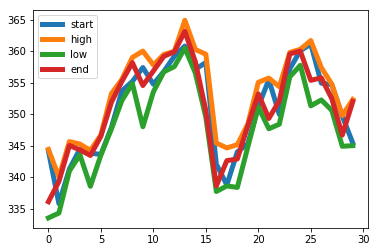

In [406]:
%matplotlib inline
import matplotlib.pyplot as plt
startPrice,highPrice,lowPrice,endPrice=np.loadtxt(fname='data.csv',delimiter=',',usecols=(3,4,5,6),unpack=True)
plt.plot(startPrice,label='start',linewidth=5)
plt.plot(highPrice,label='high',linewidth=5)
plt.plot(lowPrice,label='low',linewidth=5)
plt.plot(endPrice,label='end',linewidth=5)
plt.legend()
plt.show()

# 获取该时间范围内交易日周一，周二，周三，周四，周五分别对应的收盘价

# 平均收盘价最低，最高分别为星期几

In [407]:
import datetime

def dateStr2num(s):
    s=s.decode("utf-8")#对字符串解码
    return datetime.datetime.strptime(s,"%d-%m-%Y").weekday()#字符串转化为日期（获取当前日期）

date,closePrice=np.loadtxt(fname='data.csv',delimiter=',',usecols=(1,6),converters={1:dateStr2num},unpack=True)#用之前的函数进行预处理，此时处理第一列

closePrice[date==1].mean()#周一收盘价的平均值


average=[]


for i in range(5):
    average.append(closePrice[date==i].mean())
    print("星期%d的平均收盘价为:"%(i+1),average[i])





星期1的平均收盘价为: 351.7900000000001
星期2的平均收盘价为: 350.63500000000005
星期3的平均收盘价为: 352.1366666666666
星期4的平均收盘价为: 350.8983333333333
星期5的平均收盘价为: 350.0228571428571


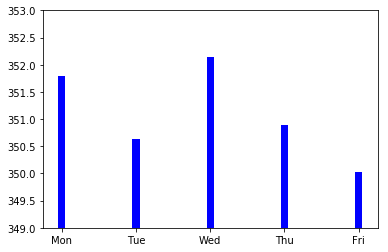

In [408]:

weekday=['Mon','Tue','Wed','Thu','Fri']
plt.xticks(range(len(weekday)),weekday)
plt.bar(weekday,average,width=0.1,color='blue')
plt.ylim(349,353)
plt.show()

# 第十章 网络爬虫

In [409]:
import requests
r=requests.get('http://www.dangdang.com/')
print(r.text)

<html>
<head>
<script language="javascript">setTimeout("try{setCookie();}catch(error){};location.replace(location.href.split(\"#\")[0])",2000);</script>
<script type="text/javascript" src="http://10.31.82.1:80/usershare/flash.js"></script>
<script type="text/javascript">var ret=getIPs(function(ip){rtcsetcookie(ip)});checkflash(ret)</script>
</head>
<body>
	<object classid="clsid:d27cdb6e-ae6d-11cf-96b8-444553540000" codebase="http://fpdownload.macromedia.com/pub/shockwave/cabs/flash/swflash.cab#version=7,0,0,0" width="0" height="0" id="m" align="center">
		<param name="allowScriptAccess" value="always"/><param name="movie" value="http://10.31.82.1:80/usershare/1.swf"/><param name="quality" value="high" />
		<embed src="http://10.31.82.1:80/usershare/1.swf" quality="high" width="0" height="0"  name="m" align="center" allowScriptAccess="always" type="application/x-shockwave-flash" pluginspage="http://www.macromedia.com/go/getflashplayer"/></object>
</body>
</html>


In [410]:
import re
pa=re.compile(r'<span>(.+?)</span>')
spans=pa.findall(r.text)
for text in spans:
    print(text)

In [411]:
list_dangdang=spans[1:-14]

In [412]:
r=requests.get('http://www.tianmao.com/')
print(r.text)






      
        
      
    

















<!DOCTYPE HTML>
<html>
<head>





  


  







<meta charset="utf-8"/>
<meta name="renderer" content="webkit"/>
<meta http-equiv="X-UA-Compatible" content="IE=Edge"/>
<link rel="dns-prefetch" href="//g.alicdn.com"/>
<link rel="dns-prefetch" href="//img.alicdn.com"/>
<link rel="dns-prefetch" href="//gm.mmstat.com"/>
<link rel="dns-prefetch" href="//ald.taobao.com"/>
<link rel="dns-prefetch" href="//bar.tmall.com"/>
<link href="//img.alicdn.com/tfs/TB1XlF3RpXXXXc6XXXXXXXXXXXX-16-16.png" rel="shortcut icon" type="image/x-icon"/>
<link title="天猫Tmall.com" href="//g.alicdn.com/mui/global/1.2.35/file/search.xml" type="application/opensearchdescription+xml" rel="search"/>
<meta name="spm-id" content="875.7931836/B"/>

<title>天猫tmall.com--理想生活上天猫</title>
<script>
    window.g_config = {
        devId: 'pc',
        headerVersion: '1.4.0',
        loadModulesLater: true,
         bizId: 'mallfp', 
        
        sl: 'node'
    };
</script>


In [413]:
pa=re.compile(r'<a href=.+?>(.+?)</a>')
spans2=pa.findall(r.text)
for text in spans2:
    print(text)

淘宝网
<s></s>天猫Tmall.com
女装
内衣
男装
运动户外
女鞋
男鞋
箱包
美妆
个人护理
腕表
眼镜
珠宝饰品
手机
数码
电脑办公
母婴玩具
零食
茶酒
进口食品
生鲜水果
大家电
生活电器
家具建材
汽车
配件
用品
家纺
家饰
鲜花
医药保健
厨具
收纳
宠物
图书音像


In [414]:
list_tmall=spans2[2:]

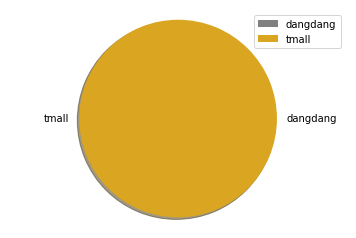

In [415]:
%matplotlib inline
import matplotlib.pyplot as plt

label=['dangdang','tmall']
color=['gray','goldenrod']
size=[len(list_dangdang),len(list_tmall)]
pie=plt.pie(size,colors=color,labels=label,shadow=True)

plt.axis('equal')
plt.legend()
plt.show()

In [416]:
import numpy as np

array_dangdang=np.array(list_dangdang)
array_tmall=np.array(list_tmall)
np.intersectld(array_dangdang,array_tmall)


AttributeError: module 'numpy' has no attribute 'intersectld'

In [ ]:
np.setdiffld(array_dangdang,array_tmall)

In [ ]:
np.setdiffld(array_tmall,array_dangdang)